<a href="https://colab.research.google.com/github/nafizahamed8/Artificial-Intelligence-repo/blob/main/email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
dataset=pd.read_csv('spam.csv',encoding='latin=1')

In [ ]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3663,ham,Huh? 6 also cannot? Then only how many mistakes?,NaN,NaN,NaN
846,ham,My stomach has been thru so much trauma I swea...,NaN,NaN,NaN
5085,ham,Sorry i missed your call. Can you please call ...,NaN,NaN,NaN
3069,ham,I'm now but have to wait till 2 for the bus to...,NaN,NaN,NaN
4909,ham,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,NaN,NaN,NaN


In [ ]:
dataset.shape

(5572, 5)

In [ ]:
#data cleaning
#eda
#data preprocessing
#Text preprocessing
#evaluation

Data Cleaning


In [ ]:
#data cleaning process
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
dataset.sample(5)

,v1,v2
830,spam,U have a secret admirer. REVEAL who thinks U R...
1533,ham,Horrible bf... I now v hungry...
1436,ham,I jus hope its true that missin me cos i'm re...
381,ham,"Yeah sure, give me a couple minutes to track d..."
4267,ham,Hey so whats the plan this sat?


In [ ]:
#renaming the column
dataset.rename(columns={'v1':'target','v2':'text'},inplace=True)
dataset.sample(5)

,target,text
1362,ham,What does the dance river do?
4376,ham,How much is torch in 9ja.
3363,ham,"Yo my trip got postponed, you still stocked up?"
1402,ham,You have registered Sinco as Payee. Log in at ...
1338,ham,Aight sorry I take ten years to shower. What's...


In [ ]:
#label encoding coverting spam,ham into number 1,0
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['target']=encoder.fit_transform(dataset['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking missing values
dataset.isnull().sum()

,0
target,0
text,0


In [ ]:
#check for duplicated values
dataset.duplicated().sum()

403

In [ ]:
#remove duplicates
dataset=dataset.drop_duplicates(keep='first')

In [ ]:
dataset.duplicated().sum()

0

EDA

In [ ]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset['target'].value_counts()

,count
target,
0,4516
1,653


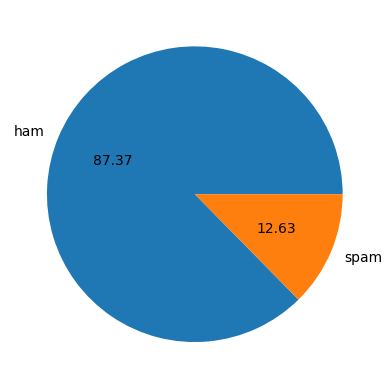

In [ ]:
#percentage of spam and ham
import matplotlib.pyplot as plt
plt.pie(dataset['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
#data is imbalanced

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#number of characters,words,sentences
#number of characters
dataset['num_characters']=dataset['text'].apply(len)
dataset.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')#required for sentence tokenization
#number of words
dataset['text'].apply(lambda x:(nltk.word_tokenize(x)))
dataset.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,target,text,num_characters,num_words,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [ ]:
dataset['num_words']=dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
del dataset['num_of_words']

In [ ]:
dataset.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
#number of sentences
dataset['num_sentences']=dataset['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
dataset[dataset['target']==0][['num_characters','num_words','num_sentences']].describe()
#spam
dataset[dataset['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text Preprocessing


In [ ]:
#lower case
#tokenization
#removing special character
#removing stop words and punctuation
#stemming

In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))


  return' '.join(y)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
transform("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
dataset['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
dataset['text'].apply(transform)

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
dataset['transformed_text']=dataset['text'].apply(transform)
dataset.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [ ]:
X=cv.fit_transform(dataset['transformed_text']).toarray()
X.shape

(5169, 6708)

In [ ]:
y=dataset['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#logistic regression model
#gradient descent algorithm implementaion

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, lr=0.5, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Fits the logistic regression model using gradient descent.
        """
        X = np.insert(X, 0, 1, axis=1)
        self.weights = np.ones(X.shape[1])

        for i in range(self.num_iter):
            y_hat = sigmoid(np.dot(X, self.weights))
            self.weights = self.weights + self.lr * (np.dot((y - y_hat), X) / X.shape[0])

        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        """
        Predicts the class labels for the given input data.
        """
        return (sigmoid(np.dot(X, self.weights) + self.bias) >= 0.5).astype(int)




model = LogisticRegression() # Create an instance of the LogisticRegression class
model.fit(X_train, y_train) # Train the model
y_predict1 = model.predict(X_test) # Make predictions

# Evaluate the model
print(accuracy_score(y_test, y_predict1))
print(confusion_matrix(y_test, y_predict1))
print(precision_score(y_test, y_predict1))

0.9516441005802708
[[868  21]
 [ 29 116]]
0.8467153284671532


In [ ]:
print(f1_score(y_test, y_predict1))
print(recall_score(y_test, y_predict1))

0.8226950354609929
0.8
